In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer
import random


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import folium
from folium import plugins
from folium.plugins import HeatMap

In [53]:
df_DC = pd.read_csv("listingsD.C_prepar.csv")
df_DC = df_DC.loc[df_DC['price'] < 400]
df_DC

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,Historic Anacostia,38.86177,-76.98966,Private room,55,2,74,2020-11-30,0.60,2,341,"Washington, D.C."
1,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91409,-76.99368,Private room,99,2,31,2016-09-22,0.25,3,173,"Washington, D.C."
2,"Kalorama Heights, Adams Morgan, Lanier Heights",38.91933,-77.04124,Entire home/apt,74,3,95,2020-03-05,0.69,2,177,"Washington, D.C."
3,"Kalorama Heights, Adams Morgan, Lanier Heights",38.91966,-77.04306,Private room,42,2,112,2019-10-30,0.82,2,0,"Washington, D.C."
4,"Dupont Circle, Connecticut Avenue/K Street",38.91146,-77.03636,Entire home/apt,185,2,154,2020-10-05,1.18,2,1,"Washington, D.C."
...,...,...,...,...,...,...,...,...,...,...,...,...
4188,"Cathedral Heights, McLean Gardens, Glover Park",38.93250,-77.07310,Entire home/apt,89,1,3,2020-12-11,3.00,3,161,"Washington, D.C."
4189,"Cleveland Park, Woodley Park, Massachusetts Av...",38.93320,-77.07125,Entire home/apt,89,1,3,2020-12-11,3.00,3,0,"Washington, D.C."
4190,"Cathedral Heights, McLean Gardens, Glover Park",38.93226,-77.07309,Entire home/apt,89,2,3,2020-12-11,3.00,3,174,"Washington, D.C."
4191,"Cathedral Heights, McLean Gardens, Glover Park",38.93159,-77.07300,Entire home/apt,100,2,1,2020-12-20,1.00,3,334,"Washington, D.C."


In [54]:
def remove_outlier(df):
    col = list(df._get_numeric_data().columns)
    col.remove('latitude')
    col.remove('longitude')
    for col_names in col:
        df[col_names] = df[col_names].apply(lambda y: np.log(y) if y > 0 else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() if y > df[col_names].mean()+3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = np.exp(df[col_names])
    return df

df_DC = remove_outlier(df_DC)

In [4]:
df_DC.shape

(4070, 12)

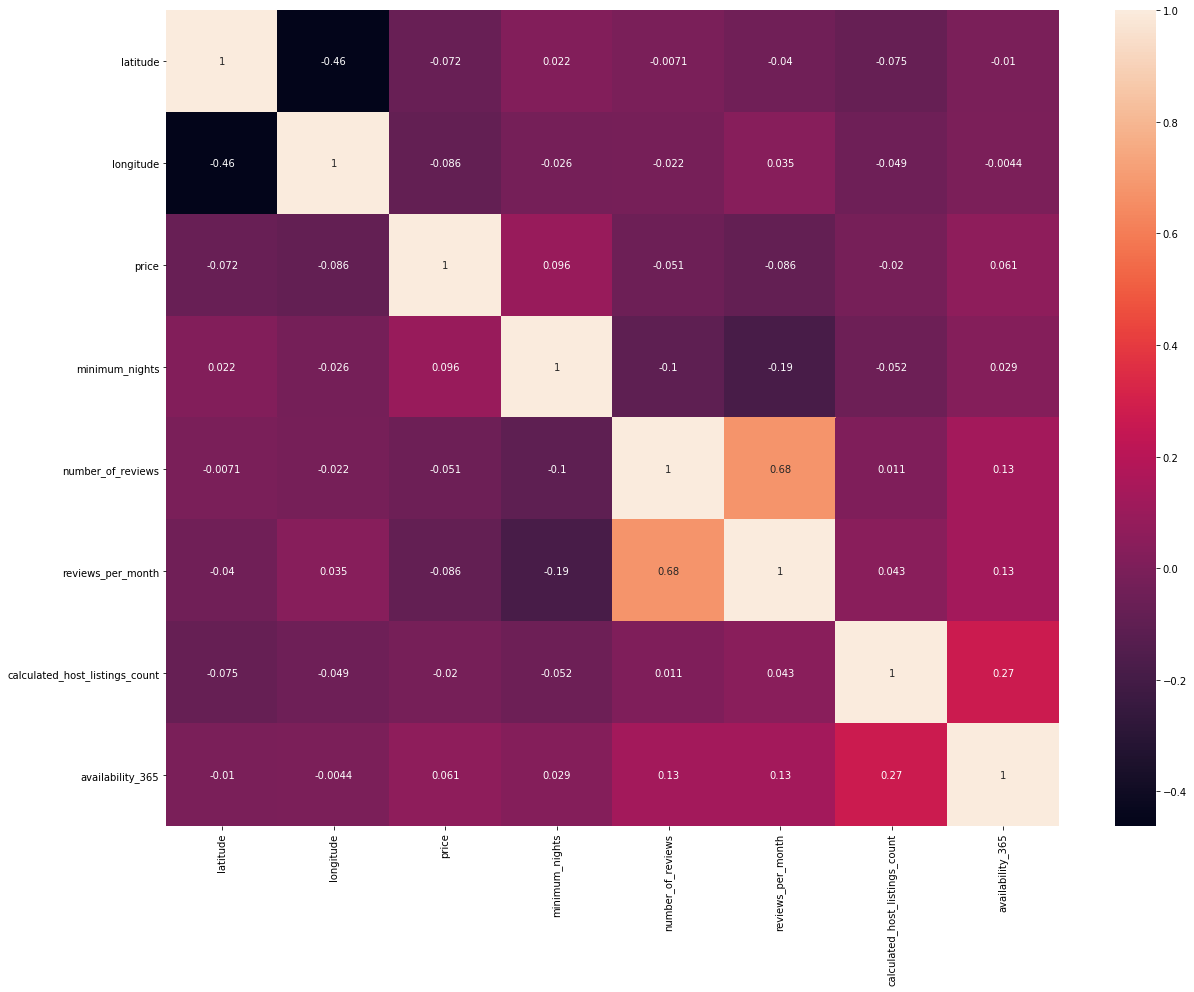

In [5]:
corrmat = df_DC[df_DC._get_numeric_data().columns].corr().round(7)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [6]:
m = folium.Map(location=[38.9, -77.03], zoom_start = 11)

heat_data = [[row['latitude'],row['longitude']] for index, row in
             df_DC[['latitude', 'longitude']].iterrows()]

hh =  HeatMap(heat_data, blur = 36).add_to(m)

m

Text(0.5, 1.05, 'Price Distribution of listings across latitudes and longitudes in Washington D.C.')

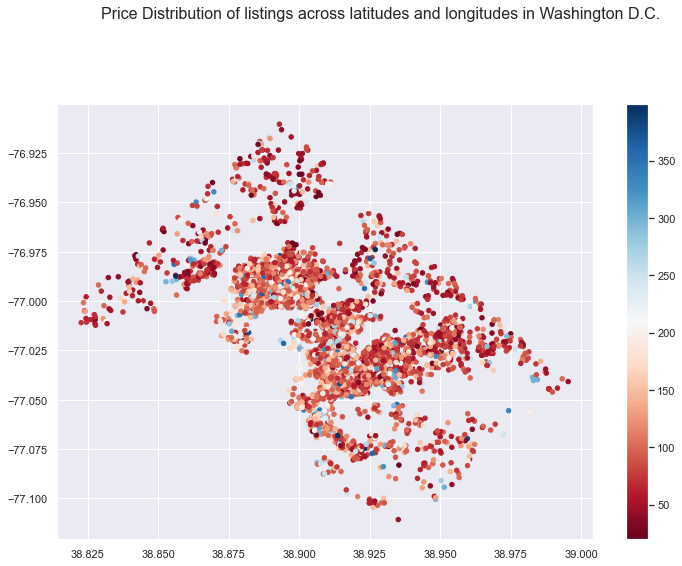

In [55]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
points = plt.scatter(df_DC['latitude'], df_DC['longitude'], c=df_DC["price"], s=20, cmap="RdBu") 
plt.colorbar(points)
plt.suptitle('Price Distribution of listings across latitudes and longitudes in Washington D.C.', y=1.05, size=16)

Text(0.5, 1.05, 'Room type Distribution of listings across latitudes and longitudes in Washington D.C.')

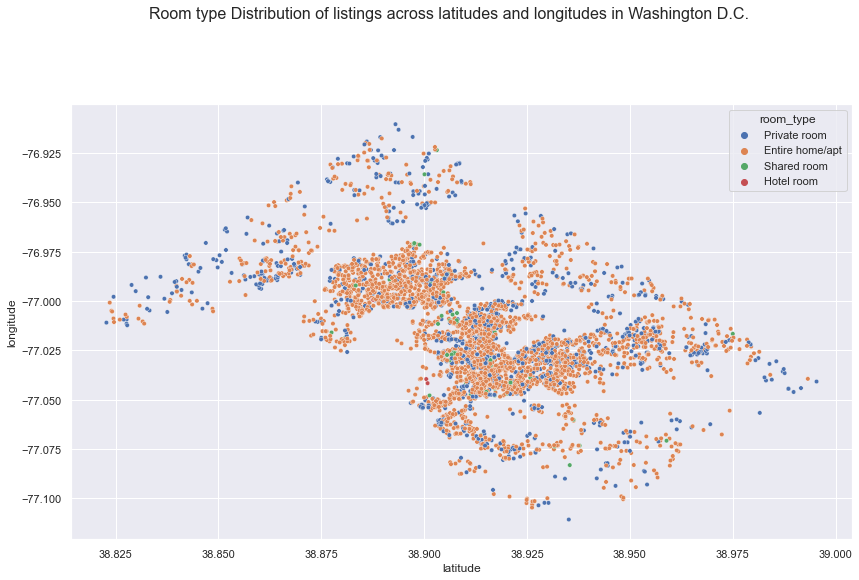

In [68]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.scatterplot(x=df_DC['latitude'], y=df_DC['longitude'], hue=df_DC["room_type"], s=20, palette="deep")
plt.suptitle('Room type Distribution of listings across latitudes and longitudes in Washington D.C.', y=1.05, size=16)

In [2]:
df_Madrid = pd.read_csv("listingsMadrid_prepar.csv")
df_Madrid = df_Madrid.drop(columns = ['datetime_diff'])
df_Madrid

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,2019-09-04,0.56,1,53,Madrid
1,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.55,2,48,Madrid
2,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,2017-07-03,0.03,1,354,Madrid
3,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,2019-07-07,0.63,1,301,Madrid
4,Legazpi,40.38985,-3.69011,Private room,25,2,136,2019-07-10,1.19,1,337,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...
11931,Portazgo,40.38460,-3.65037,Entire home/apt,39,2,2,2019-09-19,2.00,1,48,Madrid
11932,Gaztambide,40.43574,-3.71222,Shared room,23,1,1,2019-09-16,1.00,1,210,Madrid
11933,Opañel,40.39072,-3.72329,Entire home/apt,75,1,1,2019-09-14,1.00,2,349,Madrid
11934,Palacio,40.41250,-3.71472,Entire home/apt,55,1,1,2019-09-16,1.00,1,229,Madrid


In [3]:
def remove_outlier(df):
    col = list(df._get_numeric_data().columns)
    col.remove('latitude')
    col.remove('longitude')
    for col_names in col:
        df[col_names] = df[col_names].apply(lambda y: np.log(y) if y > 0 else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() if y > df[col_names].mean()+3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = np.exp(df[col_names])
    return df

df_Madrid = remove_outlier(df_Madrid)

In [37]:
df_Madrid.shape

(11936, 12)

In [11]:
m = folium.Map(location=[40.41, -3.7], zoom_start = 11)

heat_data = [[row['latitude'],row['longitude']] for index, row in
             df_Madrid[['latitude', 'longitude']].iterrows()]

hh =  HeatMap(heat_data, blur = 36).add_to(m)

m

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

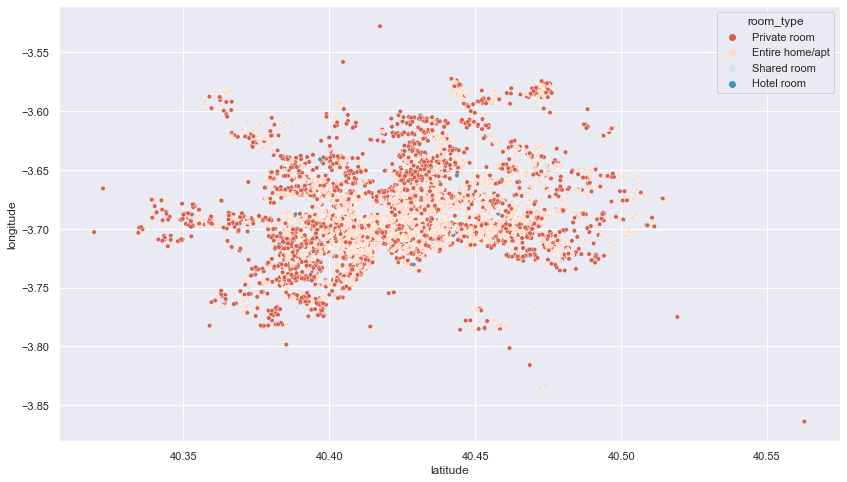

In [56]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.scatterplot(x=df_Madrid['latitude'], y=df_Madrid['longitude'], hue=df_Madrid["room_type"], s=20, palette="RdBu")

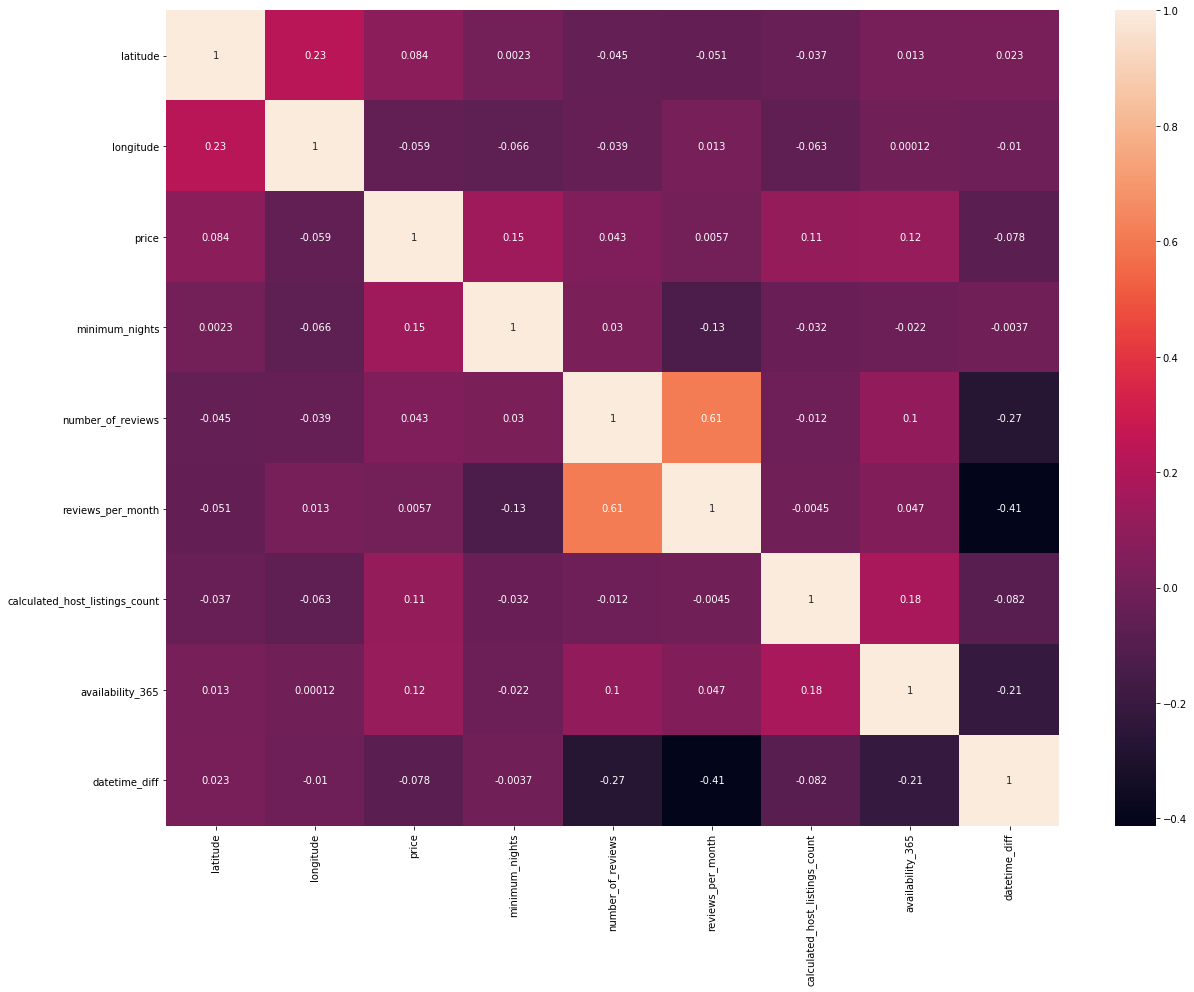

In [13]:
corrmat = df_Madrid[df_Madrid._get_numeric_data().columns].corr().round(7)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [4]:
random.seed(100)
df_Madrid_sample = df_Madrid.sample(4070)

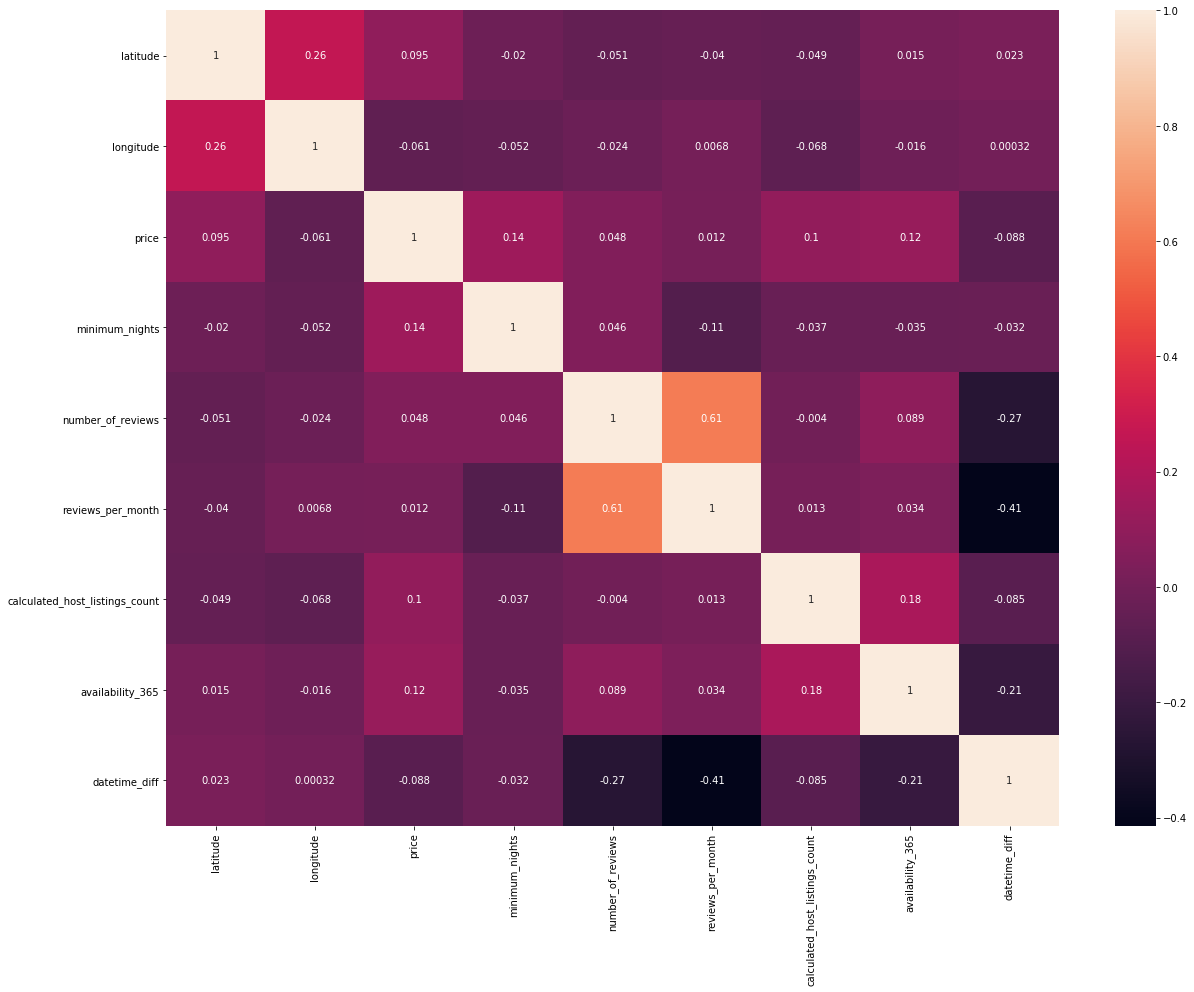

In [6]:
corrmat = df_Madrid_sample[df_Madrid_sample._get_numeric_data().columns].corr().round(7)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [23]:
m = folium.Map(location=[40.41, -3.7], zoom_start = 11)

heat_data = [[row['latitude'],row['longitude']] for index, row in
             df_Madrid_sample[['latitude', 'longitude']].iterrows()]

hh =  HeatMap(heat_data, blur = 36).add_to(m)

m

(-3.82, -3.55)

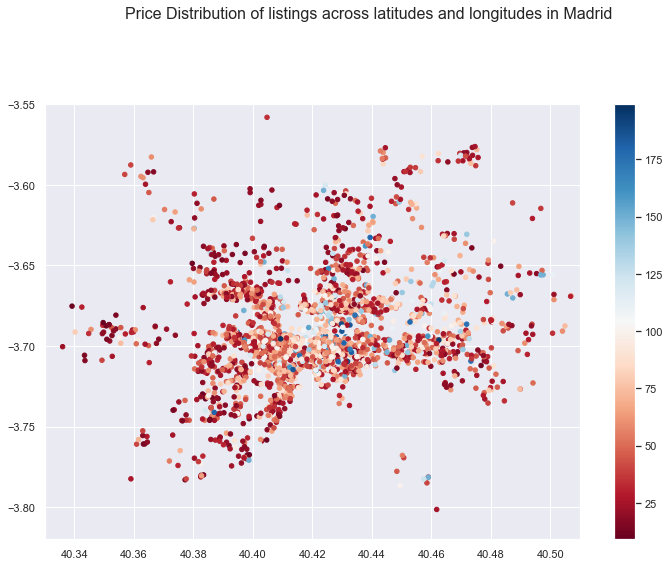

In [67]:
plt.figure(figsize=(12,8))
points = plt.scatter(df_Madrid_sample['latitude'], df_Madrid_sample['longitude'], c=df_Madrid_sample["price"], s=20, 
                     cmap="RdBu") 
plt.colorbar(points)
plt.suptitle('Price Distribution of listings across latitudes and longitudes in Madrid', y=1.05, size=16)
plt.xlim(40.330,40.510)
plt.ylim(-3.82,-3.55)

(-3.82, -3.55)

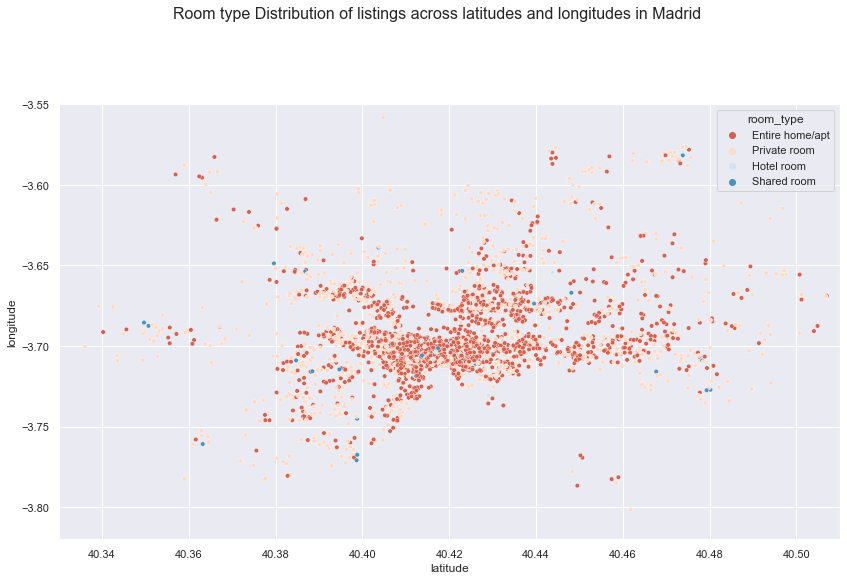

In [69]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.scatterplot(x=df_Madrid_sample['latitude'], y=df_Madrid_sample['longitude'], hue=df_Madrid_sample["room_type"], s=20, 
                palette="RdBu")
plt.suptitle('Room type Distribution of listings across latitudes and longitudes in Madrid', y=1.05, size=16)
plt.xlim(40.330,40.510)
plt.ylim(-3.82,-3.55)

In [7]:
df = pd.concat([df_DC, df_Madrid_sample])
df = df.drop(columns = ["datetime_diff"])

df = df.drop(columns = ["latitude"])
df = df.drop(columns = ["longitude"])
df

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,Historic Anacostia,Private room,55,2,74,2020-11-30,0.60,2,341,"Washington, D.C."
1,"Edgewood, Bloomingdale, Truxton Circle, Eckington",Private room,99,2,31,2016-09-22,0.25,3,173,"Washington, D.C."
2,"Kalorama Heights, Adams Morgan, Lanier Heights",Entire home/apt,74,3,95,2020-03-05,0.69,2,177,"Washington, D.C."
3,"Kalorama Heights, Adams Morgan, Lanier Heights",Private room,42,2,112,2019-10-30,0.82,2,0,"Washington, D.C."
4,"Dupont Circle, Connecticut Avenue/K Street",Entire home/apt,185,2,154,2020-10-05,1.18,2,1,"Washington, D.C."
...,...,...,...,...,...,...,...,...,...,...
3522,Justicia,Shared room,16,1,156,2019-09-02,4.80,8,73,Madrid
1923,Jerónimos,Entire home/apt,90,3,5,2018-11-28,0.11,2,343,Madrid
4183,Palacio,Entire home/apt,70,1,88,2019-09-01,3.07,1,160,Madrid
8762,Palacio,Entire home/apt,110,1,27,2019-09-02,3.06,4,146,Madrid


In [5]:
#df = pd.read_csv("DC-Madrid.csv")
#df = df.drop(columns = ["neighbourhood"])
#df.loc[df.city == "Madrid"].to_csv('Sample_Madrid.csv', index=False)
#df.loc[df.city == "Washington, D.C."].to_csv('Sample_Washington.csv', index=False)
#df.to_csv('DC-Madrid.csv', index=False)

In [138]:
df.groupby('city').aggregate('mean').round()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
city,,,,,,
Madrid,65.0,2.0,38.0,2.0,3.0,144.0
"Washington, D.C.",119.0,2.0,41.0,1.0,2.0,109.0


In [139]:
df.groupby('city').aggregate('median').round()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
city,,,,,,
Madrid,60,2,18,1.0,1,109
"Washington, D.C.",99,2,20,1.0,1,47


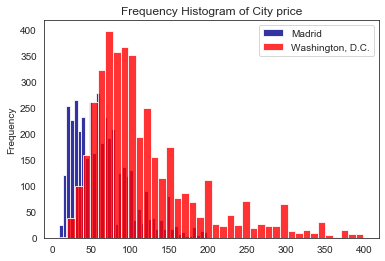

In [84]:

x1 = df.loc[df.city=='Madrid', 'price']
x2 = df.loc[df.city=='Washington, D.C.', 'price']

kwargs = dict(alpha=0.8, bins=40)

plt.hist(x1, **kwargs, color='darkblue', label='Madrid')
plt.hist(x2, **kwargs, color='r', label='Washington, D.C.')
plt.gca().set(title='Frequency Histogram of City price', ylabel='Frequency')
plt.legend();

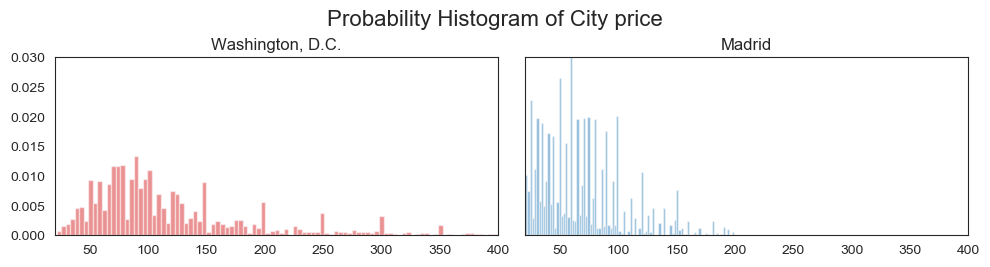

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue']

for i, (ax, city) in enumerate(zip(axes.flatten(), df.city.unique())):
    x = df.loc[df.city==city, 'price']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(city), color=colors[i])
    ax.set_title(city)

plt.suptitle('Probability Histogram of City price', y=1.05, size=16)
ax.set_xlim(20, 400); ax.set_ylim(0, 0.03);
plt.tight_layout();

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


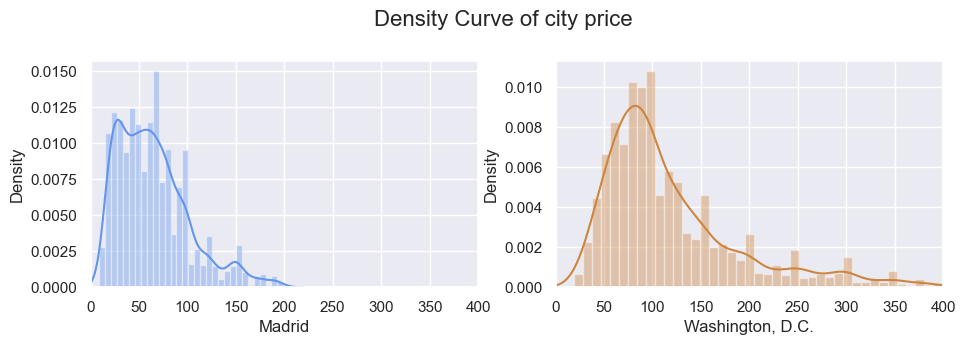

In [33]:
x1 = df.loc[df.city=='Madrid', 'price']
x2 = df.loc[df.city=='Washington, D.C.', 'price']

# plot
fig, axes = plt.subplots(1, 2, figsize=(11, 3), sharex = True, dpi=100)
sns.distplot(x1 , color="cornflowerblue", ax=axes[0], axlabel='Madrid')
sns.distplot(x2 , color="peru", ax=axes[1], axlabel='Washington, D.C.')
plt.suptitle('Density Curve of city price', y=1.05, size=16)
plt.xlim(0,400);

<AxesSubplot:xlabel='room_type', ylabel='count'>

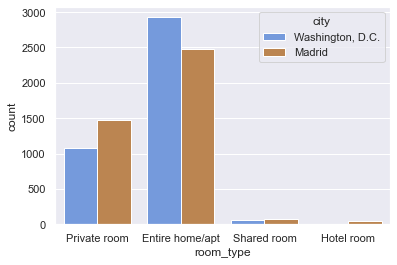

In [29]:
sns.countplot(x="room_type", hue="city", data=df, palette= ["cornflowerblue", "peru"])
#sns.set_theme(style="brightgrid")
#sns.color_palette("husl", 9)


In [144]:
df.groupby(['city','room_type']).aggregate({'room_type':'count', 'price':'mean', 'number_of_reviews':'mean', 
                                            'reviews_per_month':'mean','calculated_host_listings_count':'mean' ,
                                            'availability_365':'mean'}).round()

room_type  price  number_of_reviews  \
city             room_type                                              
Madrid           Entire home/apt       2487   83.0               44.0   
                 Hotel room              47   69.0               27.0   
                 Private room          1480   36.0               28.0   
                 Shared room             56   30.0               22.0   
Washington, D.C. Entire home/apt       2929  134.0               44.0   
                 Hotel room               8  186.0               41.0   
                 Private room          1076   80.0               33.0   
                 Shared room             57   53.0               14.0   

                                  reviews_per_month  \
city             room_type                            
Madrid           Entire home/apt                2.0   
                 Hotel room                     1.0   
                 Private room                   2.0   
                 Shared room                    1.0   
Washington, D.C. Entire home/apt                2.0   
                 Hotel room                     1.0   
                 Private room                   1.0   
                 Shared room                    1.0   

                                  calculated_host_listings_count  \
city             room_type                                         
Madrid           Entire home/apt                             3.0   
                 Hotel room                                  7.0   
                 Private room                                3.0   
                 Shared room                                 8.0   
Washington, D.C. Entire home/apt                             2.0   
                 Hotel room                                  9.0   
                 Private room                                3.0   
                 Shared room                                 4.0   

                                  availability_365  
city             room_type                          
Madrid           Entire home/apt             146.0  
                 Hotel room                  212.0  
                 Private room                136.0  
                 Shared room                 199.0  
Washington, D.C. Entire home/apt             105.0  
                 Hotel room                  294.0  
                 Private room                119.0  
                 Shared room                 126.0

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


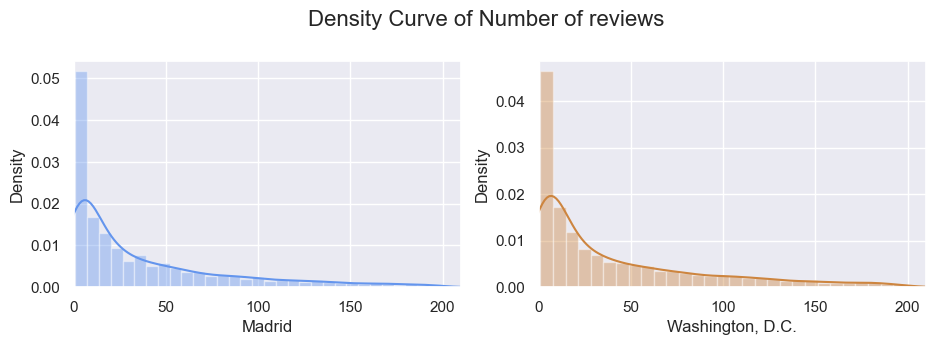

In [66]:
x1 = df.loc[df.city=='Madrid', 'number_of_reviews']
x2 = df.loc[df.city=='Washington, D.C.', 'number_of_reviews']

# plot
fig, axes = plt.subplots(1, 2, figsize=(11, 3), sharex=True, dpi=100)
sns.distplot(x1 , color="cornflowerblue", ax=axes[0], axlabel='Madrid')
sns.distplot(x2 , color="peru", ax=axes[1], axlabel='Washington, D.C.')
plt.suptitle('Density Curve of Number of reviews', y=1.05, size=16)

plt.xlim(0,210);


H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


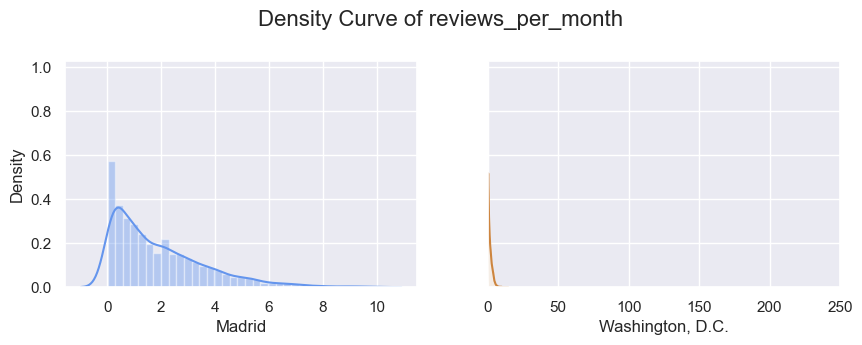

In [38]:
x1 = df.loc[df.city=='Madrid', 'reviews_per_month']
x2 = df.loc[df.city=='Washington, D.C.', 'reviews_per_month']

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="cornflowerblue", ax=axes[0], axlabel='Madrid')
sns.distplot(x2 , color="peru", ax=axes[1], axlabel='Washington, D.C.')
plt.suptitle('Density Curve of reviews_per_month', y=1.05, size=16)

plt.xlim(0,250);


H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


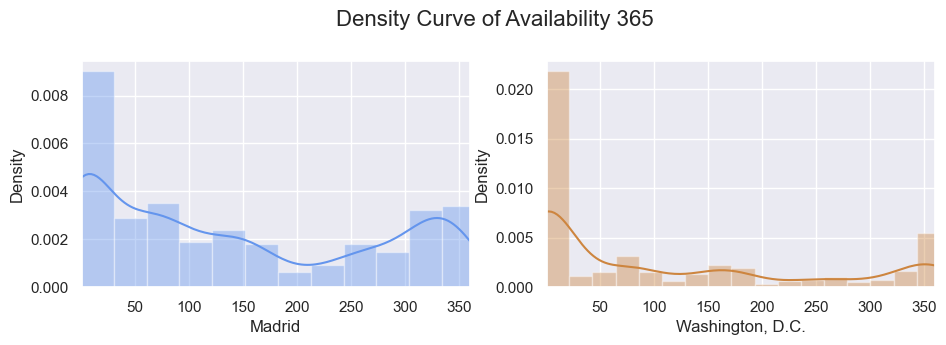

In [39]:
x1 = df.loc[df.city=='Madrid', 'availability_365']
x2 = df.loc[df.city=='Washington, D.C.', 'availability_365']

# plot
fig, axes = plt.subplots(1, 2, figsize=(11, 3), sharex=True, dpi=100)
sns.distplot(x1 , color="cornflowerblue", ax=axes[0], axlabel='Madrid')
sns.distplot(x2 , color="peru", ax=axes[1], axlabel='Washington, D.C.')
plt.suptitle('Density Curve of Availability 365', y=1.05, size=16)

plt.xlim(1,360);


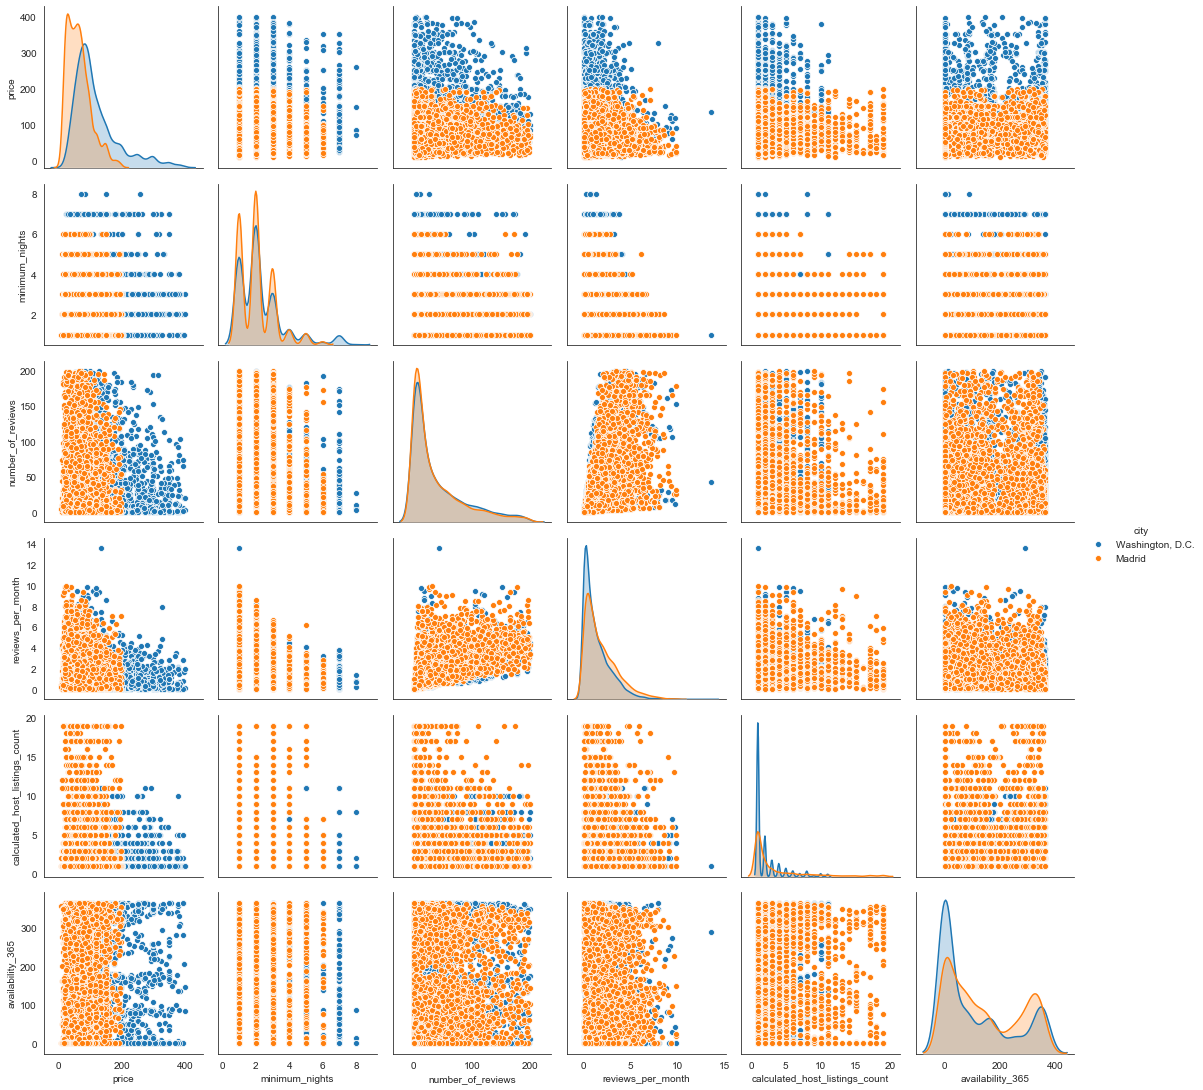

In [143]:
sns.pairplot(df, hue="city", height=2.5)

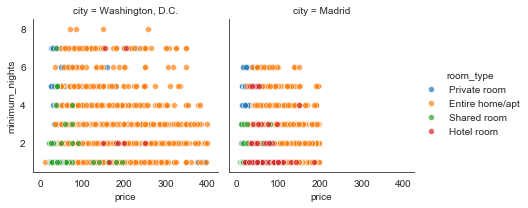

In [122]:
g = sns.FacetGrid(df, col="city", hue="room_type")
g.map(sns.scatterplot, "price", "minimum_nights", alpha=.7)
g.add_legend()

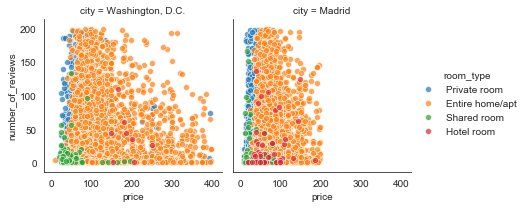

In [123]:
g = sns.FacetGrid(df, col="city", hue="room_type")
g.map(sns.scatterplot, "price", "number_of_reviews", alpha=.7)
g.add_legend()

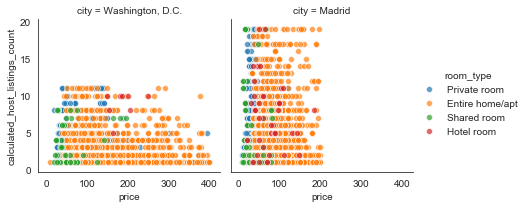

In [124]:
g = sns.FacetGrid(df, col="city", hue="room_type")
g.map(sns.scatterplot, "price", "calculated_host_listings_count", alpha=.7)
g.add_legend()

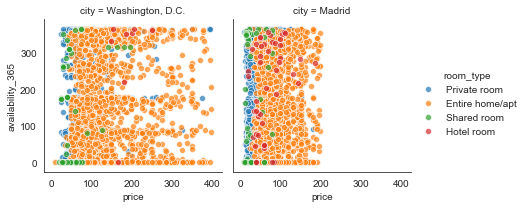

In [125]:
g = sns.FacetGrid(df, col="city", hue="room_type")
g.map(sns.scatterplot, "price", "availability_365", alpha=.7)
g.add_legend()

In [8]:
df.to_csv('DC-Madrid.csv', index=False)